In [136]:
import os
import random
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm.notebook import tqdm
from torchvision import datasets, transforms,models
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
train_dir = r"C:\Users\devis\Downloads\Train"
test_dir = r
test1_dir = r"C:\Users\devis\Downloads\Test1"
classes = os.listdir(train_dir)

In [180]:
train_transform = transforms.Compose([
transforms.RandomRotation(10),
transforms.RandomHorizontalFlip(),
transforms.Resize(40),
transforms.CenterCrop(40),
transforms.ToTensor(),
transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

In [188]:
dataset = ImageFolder(train_dir, transform = train_transform)
test1set = ImageFolder(test1_dir, transform = train_transform)
print(len(dataset))

28


In [190]:
def show_image(img, label):
    print("Label: ",dataset.classes[label], "(" + str(label)+ ")" )
    plt.imshow(img.permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  classes (0)


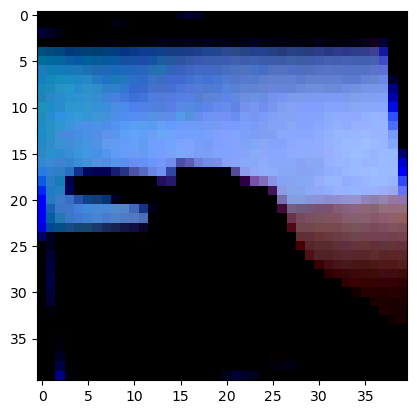

In [192]:
show_image(*dataset[6])

In [194]:
torch.manual_seed(10)
val_size = len(dataset)//5
train_size = len(dataset) - val_size
train_ds,val_ds = random_split(dataset, [train_size , val_size])
test_ds = testset
len(train_ds),len(val_ds),len(test_ds)

(23, 5, 14)

In [196]:
batch_size = 64
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size*2, num_workers=4, pin_memory=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


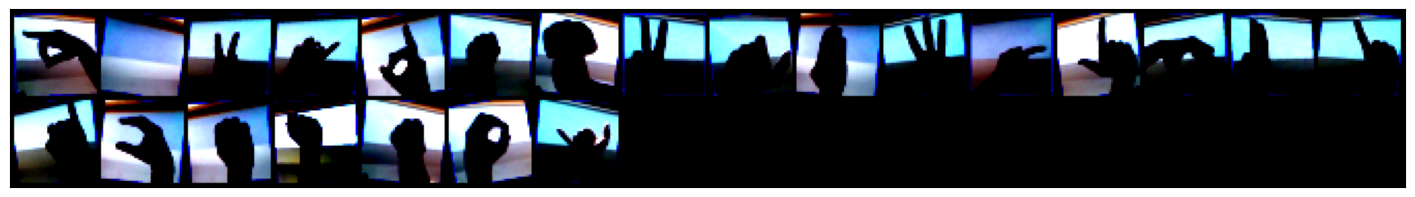

In [198]:
for images, labels in train_loader:
    fig, ax = plt.subplots(figsize=(18,10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
    break

In [199]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [150]:
img_size = (224,224)

In [152]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2 
)

In [154]:
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size = img_size, batch_size = 8,
    class_mode = 'sparse', subset = 'training')

Found 23 images belonging to 1 classes.


In [156]:
val_generator = train_datagen.flow_from_directory(
    train_dir, target_size = img_size, batch_size = 8,
    class_mode = "sparse", subset = 'validation')

Found 5 images belonging to 1 classes.


In [158]:
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu', input_shape=(224,224,3)),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(64,(3,3),activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Flatten(),
    Dense(128,activation = 'relu'),
    Dense(len(classes),activation = 'sigmoid')
])

In [160]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = "binary_crossentropy", metrics=['accuracy'])

In [162]:
model.fit(train_generator, epochs = 10, validation_data = val_generator)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 1.0000 - loss: 3.9224e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 936ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 964ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 967ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 999ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 860ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 997ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 944ms/step - accuracy: 1.0

In [163]:
val_loss,val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy:{val_accuracy*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Validation Accuracy:100.00%


In [164]:
test_images = os.listdir(test_dir)

In [165]:
def preprocess_test_image(img_path):
    img = load_img(img_path,target_size = img_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array,axis = 0)
    img_array = img_array / 255.0
    return img_array

In [166]:
predictions = []

In [167]:
for img_name in test_images:
    img_path = os.path.join(test_dir,img_name)
    img_array = preprocess_test_image(img_path)
    pred = model.predict(img_array)
    predicted_class_index = np.argmax(pred)
    predicted_class_label = classes[predicted_class_index]
    predictions.append([img_name,predicted_class_label])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


In [174]:
submissions_df = pd.DataFrame(predictions, columns = ['filename','label'])
submissions_df.to_csv('submissions.csv',index = False)

print("Predictions saved to submission.csv")

Predictions saved to submission.csv
